In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import copy
import matplotlib.pyplot as plt

In [2]:
tickers = ["AMZN","MSFT","INTC","GOOG"]
start = dt.datetime.today() - dt.timedelta(5000)
end = dt.date.today()
cl_price = pd.DataFrame()#empty dataframe to be filled with data prices
ohlcv_data = {} # empty dictionary
# looping over tickers and creating dataframe with close prices
for ticker in tickers:
    ohlcv_data[ticker] = yf.download(ticker,start,end,interval='1d')
    ohlcv_data[ticker].dropna(inplace=True,how="all")
 
tickers : ohlcv_data.keys() # redefine tickers variable after removing any tickers with corrupted data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
google = ohlcv_data['GOOG']
microsoft = ohlcv_data['MSFT']
intel = ohlcv_data['INTC']
amazon = ohlcv_data['AMZN']

In [4]:
def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()*100
    vol = df["daily_ret"].std()
    df.dropna(inplace=True)
    return vol

In [5]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]['vol']= volatility(ohlcv_data[ticker],)

In [6]:
microsoft.head()

,Open,High,Low,Close,Adj Close,Volume,vol
Date,,,,,,,
2009-05-26 00:00:00-04:00,19.540001,20.450001,19.450001,20.340000,15.409114,44991700,1.635965
2009-05-27 00:00:00-04:00,20.250000,20.600000,20.070000,20.129999,15.250025,42892900,1.635965
2009-05-28 00:00:00-04:00,20.320000,20.629999,20.049999,20.450001,15.492452,45480800,1.635965
2009-05-29 00:00:00-04:00,20.559999,20.940001,20.299999,20.889999,15.825786,46134900,1.635965
2009-06-01 00:00:00-04:00,21.000000,21.500000,20.860001,21.400000,16.212151,57317100,1.635965


In [7]:
def BollBnd(DF,n = 14):
    df = DF.copy()
    df["MA"]= df["Adj Close"].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['MA'].rolling(n).std()
    df["BB_dn"] = df["MA"] - 2*df['MA'].rolling(n).std()
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df[["MA", "BB_up", "BB_dn","BB_width"]]

In [8]:
for ticker in ohlcv_data:
    ohlcv_data[ticker][["MA", "BB_up", "BB_dn","BB_width"]]= BollBnd(ohlcv_data[ticker],)

In [9]:

def OBV(DF):
    """function to calculate On Balance Volume"""
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    df.dropna(inplace=True)
    return df['obv']

In [10]:
for ticker in ohlcv_data:
    ohlcv_data[ticker]['obv']: OBV(ohlcv_data[ticker],)

C:\Users\matth\AppData\Local\Temp\ipykernel_26432\1264110504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0
C:\Users\matth\AppData\Local\Temp\ipykernel_26432\1264110504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0
C:\Users\matth\AppData\Local\Temp\ipykernel_26432\1264110504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0
C:\Users\matth\AppData\Local\Te

In [13]:
microsoft.head(10) # first few rows for MA and BB info is "NaN"

,Open,High,Low,Close,Adj Close,Volume,vol,MA,BB_up,BB_dn,BB_width
Date,,,,,,,,,,,
2009-05-26 00:00:00-04:00,19.540001,20.450001,19.450001,20.340000,15.409114,44991700,1.635965,NaN,NaN,NaN,NaN
2009-05-27 00:00:00-04:00,20.250000,20.600000,20.070000,20.129999,15.250025,42892900,1.635965,NaN,NaN,NaN,NaN
2009-05-28 00:00:00-04:00,20.320000,20.629999,20.049999,20.450001,15.492452,45480800,1.635965,NaN,NaN,NaN,NaN
2009-05-29 00:00:00-04:00,20.559999,20.940001,20.299999,20.889999,15.825786,46134900,1.635965,NaN,NaN,NaN,NaN
2009-06-01 00:00:00-04:00,21.000000,21.500000,20.860001,21.400000,16.212151,57317100,1.635965,NaN,NaN,NaN,NaN
2009-06-02 00:00:00-04:00,21.360001,21.980000,21.200001,21.400000,16.212151,48935700,1.635965,NaN,NaN,NaN,NaN
2009-06-03 00:00:00-04:00,21.309999,21.760000,21.290001,21.730000,16.462149,56039600,1.635965,NaN,NaN,NaN,NaN
2009-06-04 00:00:00-04:00,21.770000,21.900000,21.580000,21.830000,16.537909,42330000,1.635965,NaN,NaN,NaN,NaN
2009-06-05 00:00:00-04:00,21.959999,22.309999,21.809999,22.139999,16.772751,59579200,1.635965,NaN,NaN,NaN,NaN


In [31]:
microsoft.dropna(axis=0,inplace=True)
max(microsoft['Close'])

343.1099853515625

In [86]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Get stock data
stock = yf.Ticker("AAPL")
df = stock.history(period="max")

# Calculate Bollinger Bands
df["20-day MA"] = df["Close"].rolling(window=20).mean()
df["20-day STD"] = df["Close"].rolling(window=20).std()
df["Upper Band"] = df["20-day MA"] + (df["20-day STD"] * 2)
df["Lower Band"] = df["20-day MA"] - (df["20-day STD"] * 2)

# Calculate Fibonacci retracements
df['61.8%'] = (df["High"].max() - df["Low"].min()) * 0.618 + df["Low"].min()
df['50%'] = (df["High"].max() - df["Low"].min()) * 0.5 + df["Low"].min()
df['38.2%'] = (df["High"].max() - df["Low"].min()) * 0.382 + df["Low"].min()

# Define target variable; "1" indicates an upward trend and "0" indicates a downward/no trend
df["Target"] = np.where(df["Close"] > df["Open"], 1, 0)




In [112]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,20-day MA,20-day STD,Upper Band,Lower Band,61.8%,50%,38.2%,Target
Date,,,,,,,,,,,,,,,
1981-01-12 00:00:00-05:00,0.110730,0.110730,0.109861,0.109861,23699200,0.0,0.0,0.107842,0.011394,0.130631,0.085053,112.419144,90.961296,69.503449,0
1981-01-13 00:00:00-05:00,0.106388,0.106388,0.105954,0.105954,23049600,0.0,0.0,0.108146,0.011251,0.130648,0.085644,112.419144,90.961296,69.503449,0
1981-01-14 00:00:00-05:00,0.106388,0.106822,0.106388,0.106388,14291200,0.0,0.0,0.108732,0.010808,0.130349,0.087116,112.419144,90.961296,69.503449,0
1981-01-15 00:00:00-05:00,0.108559,0.109427,0.108559,0.108559,14067200,0.0,0.0,0.109775,0.009614,0.129002,0.090547,112.419144,90.961296,69.503449,0
1981-01-16 00:00:00-05:00,0.108125,0.108125,0.107690,0.107690,13395200,0.0,0.0,0.110665,0.008426,0.127517,0.093812,112.419144,90.961296,69.503449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27 00:00:00-05:00,143.160004,147.229996,143.080002,145.929993,70492800,0.0,0.0,134.391499,6.265397,146.922294,121.860705,112.419144,90.961296,69.503449,1
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,64015300,0.0,0.0,135.060999,6.440529,147.942057,122.179942,112.419144,90.961296,69.503449,0
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,65874500,0.0,0.0,135.778999,6.635885,149.050769,122.507230,112.419144,90.961296,69.503449,1


In [108]:
feats_to_use = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       '20-day MA', '20-day STD', 'Upper Band', 'Lower Band', '61.8%', '50%',
       '38.2%', 'Target']

In [ ]:
import itertools

# list of all possible features
feats_to_use = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       '20-day MA', '20-day STD', 'Upper Band', 'Lower Band', '61.8%', '50%',
       '38.2%', 'Target']

# list to store the different combinations of features
combinations = []

# loop through all possible combinations of features
for i in range(1, len(feats_to_use)+1):
    for combination in itertools.combinations(feats_to_use, i):
        combinations.append(combination)

# print the different combinations of features
for combination in combinations:
    print(combination)

In [106]:
df.dropna(axis=0, inplace=True)

# Define feature set
X = df[['Open','20-day MA', '20-day STD', '61.8%', '50%', '38.2%']]
y = df["Target"]

In [107]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

y_preds = svm_model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy: ", accuracy)

Accuracy:  0.5589066918001885


In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
param_grid = {
    "max_depth": [5, 10, 15, 20, 25, 30, None],
    "min_samples_split": [2, 5, 10, 20, 45],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

dt_model = DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 5, random_state=42)

dt_model.fit(X_train, y_train)

y_preds = dt_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_preds)}")

Accuracy: 0.6328934967012253


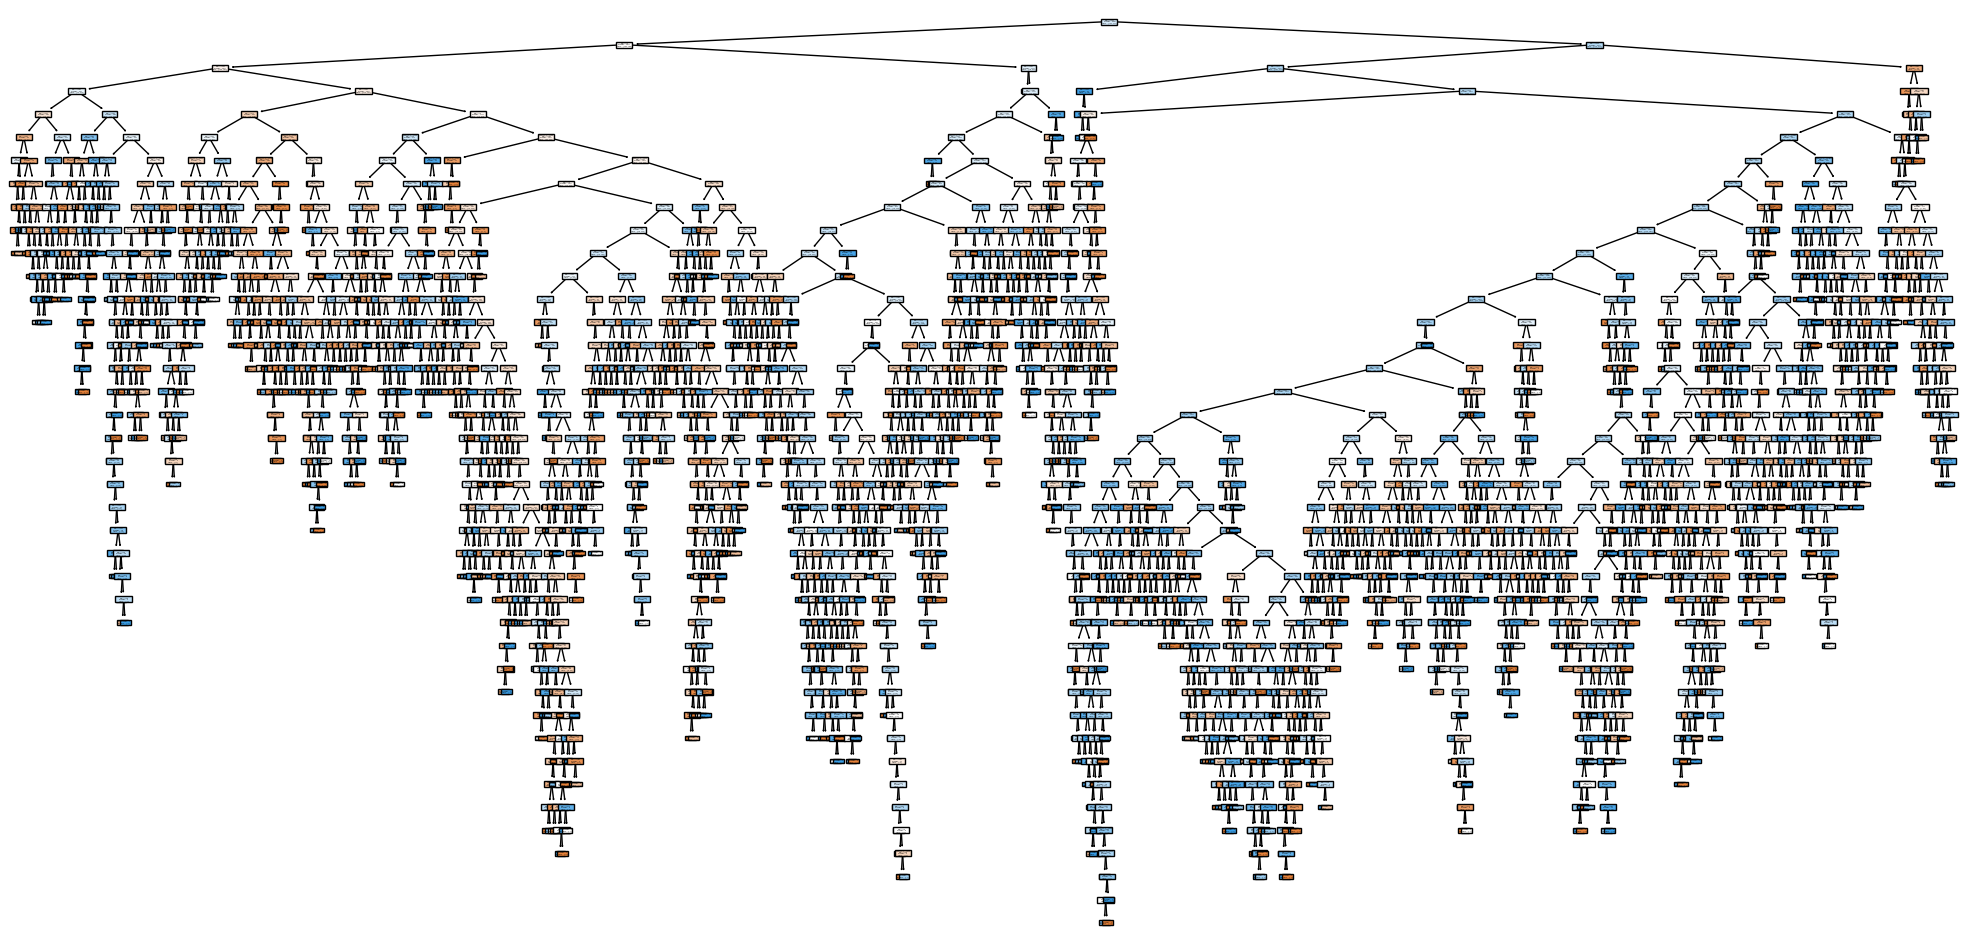

In [42]:
plt.figure(figsize=(25, 12))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.show()